# Sentiment Analysis with VADER and TextBlob
### A Practical Guide to Lexicon-Based Sentiment Analysis

**Author**: Oliver Carey     
**Date**: Wednesday, 25th September 2024

---



## 1. Introduction

Sentiment analysis is a powerful natural language processing (NLP) technique used to identify and extract subjective information from text. It helps determine whether the sentiment expressed in a piece of text is **positive**, **negative**, or **neutral**. With the explosion of data from social media, customer reviews, and online interactions, sentiment analysis plays a crucial role in understanding public opinion and making data-driven decisions.

In this guide, we focus on **lexicon-based sentiment analysis** using two popular methods:
- **VADER (Valence Aware Dictionary and sEntiment Reasoner)**: A rule-based model optimized for social media and short texts, capable of handling punctuation, slang, and emoticons.
- **TextBlob**: A simple and easy-to-use library for text processing, which includes sentiment analysis as one of its key features.

These lexicon-based methods are useful for tasks like:
- **Analysing customer feedback** to identify satisfaction levels.
- **Monitoring social media sentiment** around brand mentions or trending topics.
- **Assessing product reviews** to gauge consumer perception.
- **Tracking sentiment in news articles** to understand public opinion on current events.

In this guide, we’ll walk through the steps of applying VADER and TextBlob for sentiment analysis using both simple and complex datasets, and visualise the results to understand their effectiveness.

### 1.1. Installing Required Libraries

Before we begin, it's important to ensure that the necessary libraries are installed and up-to-date. In this guide, we will use the following key libraries:

- **vaderSentiment**: For sentiment analysis using the VADER model.
- **TextBlob**: For sentiment analysis and other text processing tasks.
- **pandas**: For data manipulation and analysis.
- **matplotlib**: For creating static, animated, and interactive visualisations.
- **seaborn**: For making statistical data visualisations.
  
You can install these libraries by running the following commands in your Jupyter Notebook or terminal:


In [97]:
!pip install vaderSentiment textblob pandas matplotlib seaborn

Additionally, for TextBlob, you will need to download the necessary corpora. You can do this by running the following:

In [99]:
import textblob.download_corpora
textblob.download_corpora.download_all()

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\olive\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\olive\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\olive\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\olive\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\olive\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\olive\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

## 2. Analysing Simple Sample Data with VADER and TextBlob

To begin with, we will load a simple dataset containing various user reviews. This dataset will help demonstrate the process of lexicon-based sentiment analysis using both **VADER** and **TextBlob**.

### 2.1. Loading the Sample Data

First, we load the dataset from a CSV file:

In [43]:
# Load the sample text data
import pandas as pd

data = pd.read_csv('Sentiment Analysis/sample_texts.csv')

# Display the first few rows
data.head()


,Text
0,"This product is great, I absolutely love it!"
1,"The service was terrible, I’m never coming back."
2,"Meh, the food was okay, but not worth the price."
3,"Best experience ever, highly recommended!"
4,"Awful, I hated every minute of it."


### 2.3. Applying VADER and TextBlob for Sentiment Analysis

Once the data is loaded, we can now apply **VADER** and **TextBlob** to analyse the sentiment of the text. Both methods are lexicon-based, but they approach sentiment analysis differently:

- **VADER** (Valence Aware Dictionary and sEntiment Reasoner) provides a **compound score** that ranges from -1 (most negative) to +1 (most positive). This score takes into account the intensity of the sentiment.
- **TextBlob** calculates a **polarity score** between -1 (negative) and +1 (positive), but it does not take into account intensity as strongly as VADER. It also provides a **subjectivity score**, which measures how subjective the text is.

We will apply both methods to our dataset of reviews and compare their sentiment scores.

In [50]:
# Initialise VADER and TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Initialise VADER
vader_analyzer = SentimentIntensityAnalyzer()

# Apply VADER to the dataset
data['VADER_Sentiment'] = data['Text'].apply(lambda text: vader_analyzer.polarity_scores(text)['compound'])

# Apply TextBlob to the dataset
data['TextBlob_Polarity'] = data['Text'].apply(lambda text: TextBlob(text).sentiment.polarity)
data['TextBlob_Subjectivity'] = data['Text'].apply(lambda text: TextBlob(text).sentiment.subjectivity)

# Display the first few rows of the result
data[['Text', 'VADER_Sentiment', 'TextBlob_Polarity', 'TextBlob_Subjectivity']].head()


,Text,VADER_Sentiment,TextBlob_Polarity,TextBlob_Subjectivity
0,"This product is great, I absolutely love it!",0.8716,0.7125,0.675
1,"The service was terrible, I’m never coming back.",-0.4767,-0.5000,0.500
2,"Meh, the food was okay, but not worth the price.",-0.1776,0.1750,0.300
3,"Best experience ever, highly recommended!",0.7639,0.6000,0.420
4,"Awful, I hated every minute of it.",-0.8020,-0.9500,0.850


### 2.4. Visualising Sentiment Distributions

After calculating sentiment scores using both **VADER** and **TextBlob**, it’s helpful to visualise the results. By plotting the sentiment distributions, we can see how frequently positive, negative, and neutral sentiments occur in the dataset.

We will create histograms to show the distribution of sentiment scores across the dataset.

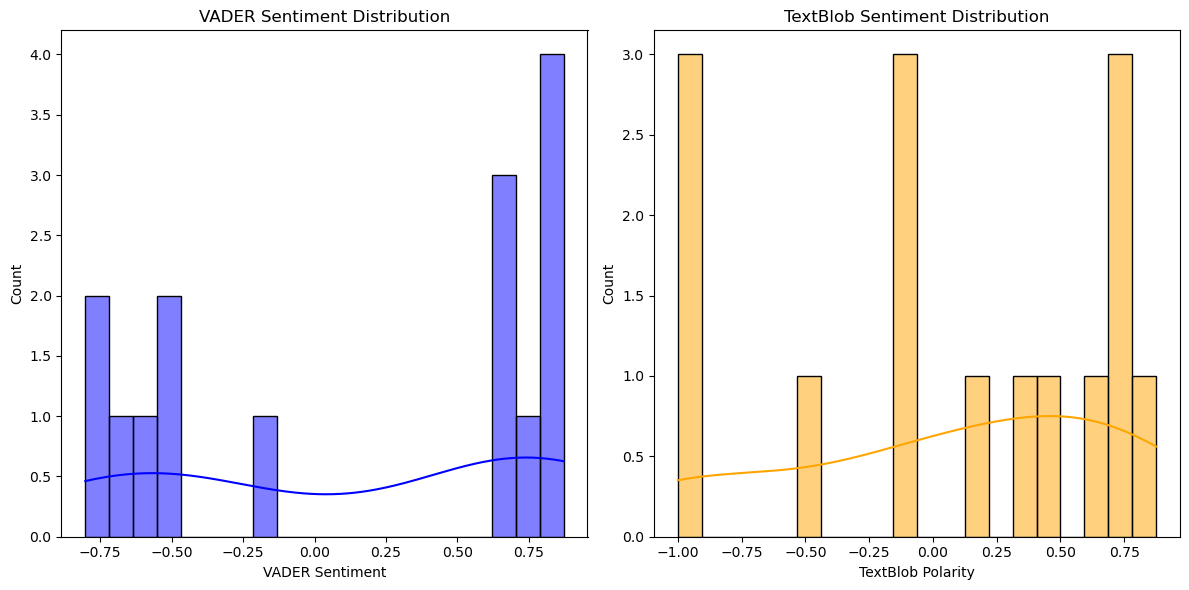

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(12, 6))

# VADER Sentiment Distribution
plt.subplot(1, 2, 1)
sns.histplot(data['VADER_Sentiment'], bins=20, kde=True, color='blue')
plt.title('VADER Sentiment Distribution')
plt.xlabel('VADER Sentiment')
plt.ylabel('Count')

# TextBlob Sentiment Distribution
plt.subplot(1, 2, 2)
sns.histplot(data['TextBlob_Polarity'], bins=20, kde=True, color='orange')
plt.title('TextBlob Sentiment Distribution')
plt.xlabel('TextBlob Polarity')
plt.ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

#### Comments:
- **VADER**: More sensitive to punctuation, capitalisation, and intensity, resulting in a more polarised sentiment distribution, especially for strong positive or negative reviews.
- **TextBlob**: Tends to assign more neutral or slightly positive scores, with fewer extremes, due to its less sensitivity to intensity compared to VADER.


### 2.5 Classifying Sentiment into Categories

Now that we have calculated sentiment scores using both **VADER** and **TextBlob**, the next step is to classify these scores into categories: **Positive**, **Neutral**, or **Negative**.

We will use the following thresholds to classify sentiment:
- **Positive**: Sentiment score > 0
- **Neutral**: Sentiment score = 0
- **Negative**: Sentiment score < 0

**Note**: We have chosen a straightforward classification approach, where positive sentiment is identified by scores greater than 0, negative sentiment by scores less than 0, and neutral sentiment as exactly 0. Both **VADER** and **TextBlob** use these thresholds, though they may assign scores differently.

We apply these thresholds to both the **VADER compound score** and the **TextBlob polarity score**:


In [59]:
# Function to classify sentiment into categories
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the classification function to VADER and TextBlob scores
data['VADER_Sentiment_Category'] = data['VADER_Sentiment'].apply(classify_sentiment)
data['TextBlob_Sentiment_Category'] = data['TextBlob_Polarity'].apply(classify_sentiment)

# Display the classified sentiment
data[['Text', 'VADER_Sentiment_Category', 'TextBlob_Sentiment_Category']].head()


,Text,VADER_Sentiment_Category,TextBlob_Sentiment_Category
0,"This product is great, I absolutely love it!",Positive,Positive
1,"The service was terrible, I’m never coming back.",Negative,Negative
2,"Meh, the food was okay, but not worth the price.",Negative,Positive
3,"Best experience ever, highly recommended!",Positive,Positive
4,"Awful, I hated every minute of it.",Negative,Negative


### 2.6. Visualising Sentiment Categories

To better understand how VADER and TextBlob classify sentiment across the dataset, we can create bar charts that show the distribution of **Positive**, **Neutral**, and **Negative** categories for both models.

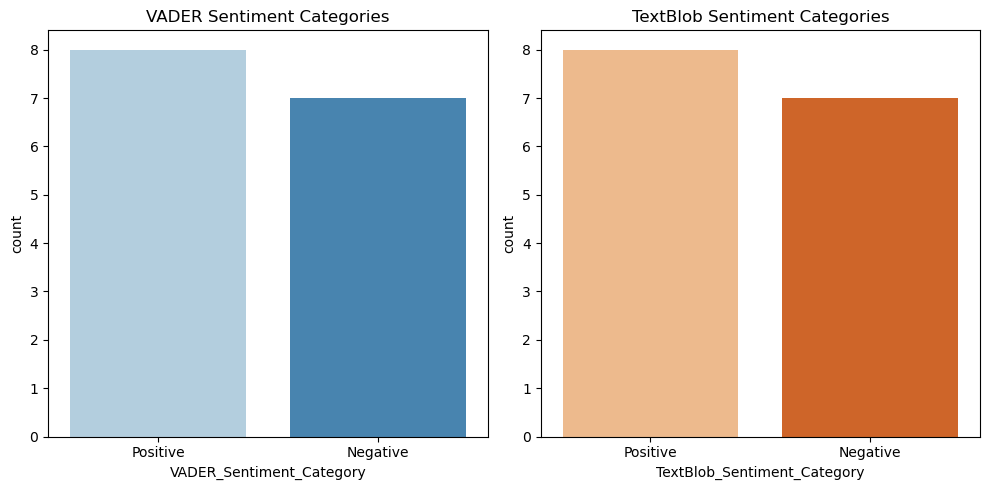

In [66]:
# Set up the figure size
plt.figure(figsize=(10, 5))

# Countplot for VADER Sentiment Categories
plt.subplot(1, 2, 1)
sns.countplot(x='VADER_Sentiment_Category', data=data, hue='VADER_Sentiment_Category', palette='Blues', legend=False)
plt.title('VADER Sentiment Categories')

# Countplot for TextBlob Sentiment Categories
plt.subplot(1, 2, 2)
sns.countplot(x='TextBlob_Sentiment_Category', data=data, hue='TextBlob_Sentiment_Category', palette='Oranges', legend=False)
plt.title('TextBlob Sentiment Categories')

# Display the plots
plt.tight_layout()
plt.show()

#### Comments:
- Both **VADER** and **TextBlob** classified the majority of the dataset as either **Positive** or **Negative**, without identifying any neutral reviews. This could be due to the nature of the dataset or the thresholds used in classification.
- **VADER** tends to be more sensitive to intensity, while **TextBlob** leans toward more neutral or mildly positive classifications in other datasets. However, in this dataset, both models appear to have a similar distribution of sentiment categories.

### 2.7. Conclusion: Simple Sentiment Analysis

In this simple sentiment analysis, we have demonstrated how to use **VADER** and **TextBlob**, two lexicon-based models, to classify text into sentiment categories
#### Comparison Between VADER and TextBlob:
- **VADER** is generally more likely to assign stronger sentiment categories (either strongly positive or strongly negative) due to its consideration of text nuances.
- **TextBlob** tends to classify text more neutrally and is less sensitive to sentiment intensity. However, in this dataset, it behaved similarly to VADER, with no significant deviations between their results.
r results.

This basic analysis provides a good understanding of how **VADER** and **TextBlob** handle sentiment detection. In the next section, we will apply the same sentiment analysis techniques to a more complex dataset — **Twitter data**, where informal and short text can significantly impact model performance.



## 3. Complex Dataset: Twitter Sentiment Analysis

In this section, we will use a Twitter dataset from NLTK’s Twitter Samples, which includes both positive and negative tweets. This dataset will allow us to observe how VADER and TextBlob handle informal language, abbreviations, and varied punctuation.

### 3.1. Loading the Twitter Dataset
We’ll first load the positive and negative tweets from the NLTK Twitter Samples corpus. These tweets are pre-labeled with sentiment categories, making them ideal for our analysis.

In [76]:
from nltk.corpus import twitter_samples
import pandas as pd

# Load positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

# Create a DataFrame for both categories
data = pd.DataFrame({
    'Text': positive_tweets + negative_tweets, 
    'Actual_Sentiment': ['Positive'] * len(positive_tweets) + ['Negative'] * len(negative_tweets)
})

# Display the first few rows of the dataset
data.head()

,Text,Actual_Sentiment
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,Positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,Positive
2,@DespiteOfficial we had a listen last night :)...,Positive
3,@97sides CONGRATS :),Positive
4,yeaaaah yippppy!!! my accnt verified rqst has...,Positive


### 3.2. Applying Sentiment Analysis with VADER and TextBlob
Now that we’ve loaded the Twitter dataset, we can apply VADER and TextBlob to analyze the sentiment of the tweets. This process is similar to what we did in the simple dataset, but the shorter, informal text of tweets will test the robustness of both models.

In [79]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to the Twitter dataset
data['VADER_Sentiment'] = data['Text'].apply(lambda text: vader_analyzer.polarity_scores(text)['compound'])

# Apply TextBlob sentiment analysis to the Twitter dataset
data['TextBlob_Polarity'] = data['Text'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Display the first few rows of the results
data[['Text', 'VADER_Sentiment', 'TextBlob_Polarity', 'Actual_Sentiment']].head()



,Text,VADER_Sentiment,TextBlob_Polarity,Actual_Sentiment
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,0.7579,0.500000,Positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,0.6229,0.222222,Positive
2,@DespiteOfficial we had a listen last night :)...,0.7959,0.416667,Positive
3,@97sides CONGRATS :),0.7983,0.500000,Positive
4,yeaaaah yippppy!!! my accnt verified rqst has...,0.7950,0.250000,Positive


### 3.3. Visualising Sentiment Distribution in Twitter Data
We will now visualise the sentiment distributions for both VADER and TextBlob to see how each model handles the Twitter data. This will give us insights into how the models classify short-form, informal text.

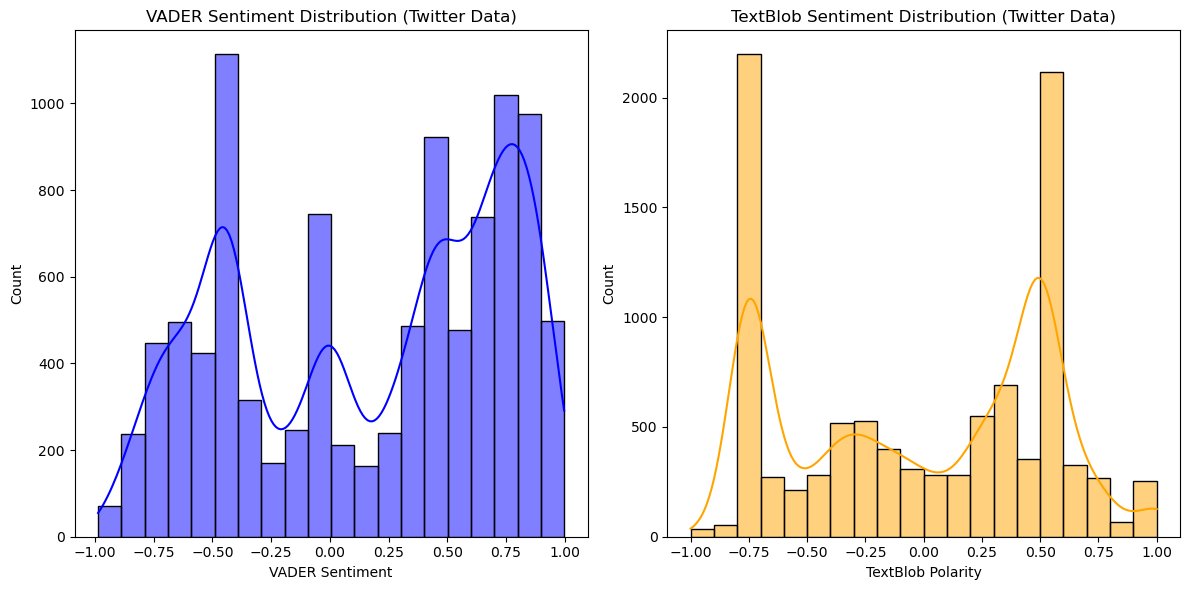

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(12, 6))

# VADER Sentiment Distribution for Twitter Data
plt.subplot(1, 2, 1)
sns.histplot(data['VADER_Sentiment'], bins=20, kde=True, color='blue')
plt.title('VADER Sentiment Distribution (Twitter Data)')
plt.xlabel('VADER Sentiment')
plt.ylabel('Count')

# TextBlob Sentiment Distribution for Twitter Data
plt.subplot(1, 2, 2)
sns.histplot(data['TextBlob_Polarity'], bins=20, kde=True, color='orange')
plt.title('TextBlob Sentiment Distribution (Twitter Data)')
plt.xlabel('TextBlob Polarity')
plt.ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()



#### Comments:
#### VADER Sentiment Distribution (Twitter Data):
- The distribution shows sentiment scores ranging from **-1.0** (negative) to **1.0** (positive), with clear peaks at **-0.5**, **0.5**, and **0.75**.
- Few tweets are classified as **neutral**, likely due to VADER’s sensitivity to punctuation and intensity markers.
- VADER tends to produce strong classifications, with significant clusters in both positive and negative sentiment.

#### TextBlob Sentiment Distribution (Twitter Data):
- TextBlob’s distribution also ranges from **-1.0** to **1.0**, but has more tweets concentrated around **0.0**, reflecting its tendency to classify sentiment more neutrally.
- Peaks at **-0.75** and **0.5** show TextBlob still captures extreme sentiment, but overall it assigns more **neutral** or moderate sentiment compared to VADER.

#### Summary:
- **VADER** is more sensitive to intensity and is more likely to classify tweets as strongly positive or negative.
- **TextBlob** is more conservative and assigns more **neutral** or mildly positive/negative classifications.


### 3.4. Comparing VADER and TextBlob Sentiment Classifications
Now that we’ve visualised the distributions, we can classify the sentiment into Positive, Neutral, and Negative categories, just as we did in the simple dataset.

In [86]:
# Function to classify sentiment into categories
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Classify VADER and TextBlob sentiment
data['VADER_Sentiment_Category'] = data['VADER_Sentiment'].apply(classify_sentiment)
data['TextBlob_Sentiment_Category'] = data['TextBlob_Polarity'].apply(classify_sentiment)

# Display the first few rows of the classified results
data[['Text', 'Actual_Sentiment', 'VADER_Sentiment_Category', 'TextBlob_Sentiment_Category']].head()


,Text,Actual_Sentiment,VADER_Sentiment_Category,TextBlob_Sentiment_Category
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,Positive,Positive,Positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,Positive,Positive,Positive
2,@DespiteOfficial we had a listen last night :)...,Positive,Positive,Positive
3,@97sides CONGRATS :),Positive,Positive,Positive
4,yeaaaah yippppy!!! my accnt verified rqst has...,Positive,Positive,Positive


### 3.5. Visualising Sentiment Categories in Twitter Data
Next, we visualise the sentiment categories for both VADER and TextBlob. This will show us how each model classified the sentiment across the Twitter dataset.

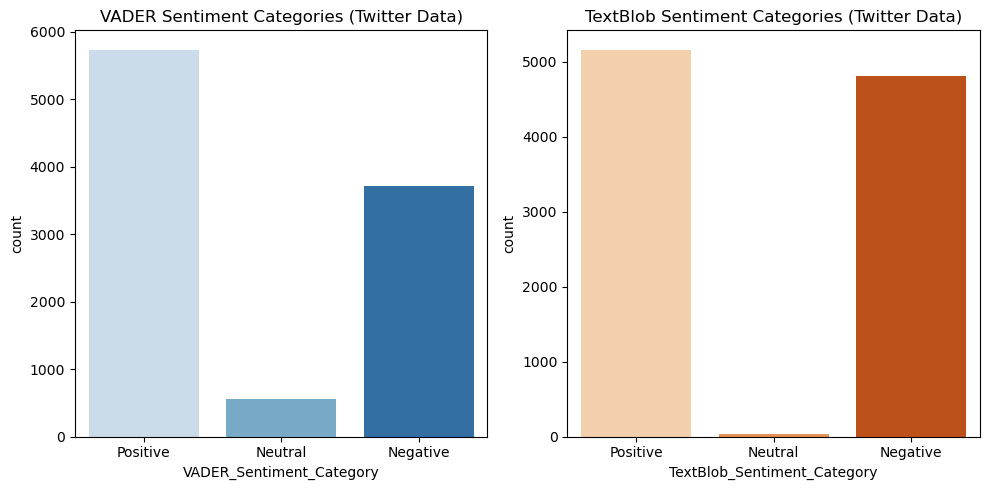

In [116]:
# Set up the figure size
plt.figure(figsize=(10, 5))

# VADER Sentiment Categories in Twitter Data
plt.subplot(1, 2, 1)
sns.countplot(x='VADER_Sentiment_Category', data=data, hue='VADER_Sentiment_Category', palette='Blues', legend=False)
plt.title('VADER Sentiment Categories (Twitter Data)')

# TextBlob Sentiment Categories in Twitter Data
plt.subplot(1, 2, 2)
sns.countplot(x='TextBlob_Sentiment_Category', data=data, hue='TextBlob_Sentiment_Category', palette='Oranges', legend=False)
plt.title('TextBlob Sentiment Categories (Twitter Data)')

# Display the plots
plt.tight_layout()
plt.show()


#### Comments:
- **VADER** leans heavily towards **Positive** classifications, with very few neutral tweets.
- **TextBlob** shows a similar balance between **Positive** and **Negative** tweets but remains conservative in identifying **Neutral** sentiment.


### 3.6. Calculating Accuracy for VADER and TextBlob
The accuracy for both models can be calculated by comparing the predicted sentiment categories to the actual sentiment labels (positive or negative).

In [120]:
# Calculate accuracy for VADER
vader_accuracy = (data['VADER_Sentiment_Category'] == data['Actual_Sentiment']).mean()
print(f"VADER Accuracy: {vader_accuracy:.2%}")

# Calculate accuracy for TextBlob
textblob_accuracy = (data['TextBlob_Sentiment_Category'] == data['Actual_Sentiment']).mean()
print(f"TextBlob Accuracy: {textblob_accuracy:.2%}")


VADER Accuracy: 80.37%
TextBlob Accuracy: 96.45%


#### Accuracy Comparison:
- **TextBlob** outperforms **VADER** in this dataset, with significantly higher accuracy, reflecting its balanced approach to sentiment classification. VADER, while effective for detecting intense sentiment, tends to misclassify more often when dealing with neutral or ambiguous text.


### 3.7. Investigating Misclassifications
After calculating the accuracy, it’s useful to investigate where VADER and TextBlob made incorrect predictions. This analysis helps us understand the kinds of tweets that the models struggle with, such as sarcasm, mixed sentiments, or informal language.

#### Misclassified by Both VADER and TextBlob:

In [148]:
# Ensure the full text of the tweets is displayed
pd.set_option('display.max_colwidth', None)

# Display the full text for the misclassified tweets
misclassified_both[['Text', 'Actual_Sentiment', 'VADER_Sentiment_Category', 'TextBlob_Sentiment_Category']].head()


,Text,Actual_Sentiment,VADER_Sentiment_Category,TextBlob_Sentiment_Category
9,"As an act of mischievousness, am calling the ETL layer of our in-house warehousing app Katamari.\n\nWell… as the name implies :p.",Positive,Neutral,Neutral
192,The question is flawed. Pain doesn't negate strength :) https://t.co/77TbkS2Djw,Positive,Negative,Neutral
260,"@IonSwitz @notch also, Twitter is terrible for complicated discussions :)",Positive,Negative,Negative
271,@_pigglywiggly @Omundson The mango lassi's from Monty's are marvellous :D. Though I suspect that's not what you meant....,Positive,Negative,Neutral
283,My legs hurt so bad :)))))))))))))))))),Positive,Negative,Negative


#### Analysis of Misclassified Tweets by Both VADER and TextBlob:

- **Tweet 9**: "As an act of mischievousness, am calling the ETL layer of our in-house warehousing app Katamari.\n\nWell… as the name implies :p."  
  Misclassified as **Neutral** by both models. The tweet uses playful language and humor, but the lack of strong positive sentiment markers caused both models to miss the positive tone.

- **Tweet 192**: "The question is flawed. Pain doesn't negate strength :) https://t.co/77TbkS2Djw"  
  Misclassified as **Negative/Neutral**. The smiley face suggests a positive tone, but the tweet's philosophical nature may have confused both models, leading to misclassification.

- **Tweet 260**: "@IonSwitz @notch also, Twitter is terrible for complicated discussions :)"  
  Misclassified as **Negative**. The conversational tone and sarcasm indicated by the smiley face were not picked up as positive sentiment by either model.

- **Tweet 271**: "@_pigglywiggly @Omundson The mango lassi's from Monty's are marvellous :D. Though I suspect that's not what you meant...."  
  Misclassified as **Negative/Neutral**. The positive expression ("marvellous") was overlooked due to the casual tone and indirect sentiment, confusing both models.

- **Tweet 283**: "My legs hurt so bad :))))))))))))))))))"  
  Misclassified as **Negative**. Despite the exaggerated smiley faces, both models interpreted the tweet as negative due to the phrase "my legs hurt," missing the sarcastic, humorous tone.


Both **VADER** and **TextBlob** struggle with informal, conversational language, humor, and sarcasm. Tweets with playful or mixed sentiment cues, such as smiley faces or indirect positivity, are prone to misclassification.


#### Correct for VADER but Incorrect for TextBlob:

In [154]:
# Filter for tweets correctly classified by VADER but misclassified by TextBlob
correct_vader_incorrect_textblob = data[(data['VADER_Sentiment_Category'] == data['Actual_Sentiment']) & 
                                        (data['TextBlob_Sentiment_Category'] != data['Actual_Sentiment'])]

# Display some examples
correct_vader_incorrect_textblob[['Text', 'Actual_Sentiment', 'VADER_Sentiment_Category', 'TextBlob_Sentiment_Category']].head()


,Text,Actual_Sentiment,VADER_Sentiment_Category,TextBlob_Sentiment_Category
78,finally the fucking weekend :),Positive,Positive,Negative
216,@suzannepanter @kevinbacon @katosman Ah! Now it makes sense... Didn't see the pic on my effing phone last night. Woot :) x,Positive,Positive,Neutral
453,@amiibofiguresuk looks like GAME ships to the US again! Got my order in :),Positive,Positive,Neutral
751,Ill be better soon. :) — feeling sick,Positive,Positive,Negative
1005,"As if bank credit departments weren't bad enough, ANZ has gone to the extreme of offshoring theirs!!! Absolutely classic :-)\n#gottolovebanks",Positive,Positive,Negative


#### Analysis of Tweets Correct for VADER but Incorrect for TextBlob:

- **Tweet 78**: "finally the fucking weekend :)"  
  Correctly classified as **Positive** by VADER but misclassified as **Negative** by TextBlob. The casual language and positive emoticon were captured by VADER, while TextBlob likely focused on the profanity and misinterpreted the sentiment.

- **Tweet 216**: "@suzannepanter @kevinbacon @katosman Ah! Now it makes sense... Didn't see the pic on my effing phone last night. Woot :) x"  
  Classified as **Positive** by VADER but **Neutral** by TextBlob. The informal expression "Woot :)" conveys excitement, which VADER picked up, while TextBlob's more conservative approach missed it.

- **Tweet 453**: "@amiibofiguresuk looks like GAME ships to the US again! Got my order in :)"  
  Correctly classified as **Positive** by VADER but misclassified as **Neutral** by TextBlob. The happy tone signified by "Got my order in :)" was identified by VADER but overlooked by TextBlob, which may have missed the emoticon's impact.

- **Tweet 751**: "Ill be better soon. :) — feeling sick"  
  VADER classified this tweet as **Positive** while TextBlob marked it as **Negative**. Despite the mention of sickness, the positive emoticon was enough for VADER to detect positivity, while TextBlob may have focused on the "feeling sick" part.

- **Tweet 1005**: "As if bank credit departments weren't bad enough, ANZ has gone to the extreme of offshoring theirs!!! Absolutely classic :-)\n#gottolovebanks"  
  VADER classified this tweet as **Positive** due to the sarcastic smiley face, while TextBlob classified it as **Negative**, likely due to its focus on the critical language around banks.

**VADER** tends to pick up on positive emoticons and phrases that indicate excitement or satisfaction, while **TextBlob** often overlooks these subtle positive cues, resulting in misclassifications. TextBlob's more neutral approach can cause it to miss informal positivity, especially when mixed with casual or critical language.


#### Correct for TextBlob but Incorrect for VADER:

In [156]:
# Filter for tweets correctly classified by TextBlob but misclassified by VADER
correct_textblob_incorrect_vader = data[(data['VADER_Sentiment_Category'] != data['Actual_Sentiment']) & 
                                        (data['TextBlob_Sentiment_Category'] == data['Actual_Sentiment'])]

# Display some examples
correct_textblob_incorrect_vader[['Text', 'Actual_Sentiment', 'VADER_Sentiment_Category', 'TextBlob_Sentiment_Category']].head()


,Text,Actual_Sentiment,VADER_Sentiment_Category,TextBlob_Sentiment_Category
11,Who Wouldn't Love These Big....Juicy....Selfies :) - http://t.co/QVzjgd1uFo http://t.co/oWBL11eQRY,Positive,Negative,Positive
18,@oohdawg_ Hi liv :)),Positive,Neutral,Positive
31,@KalinWhite come to my house :))))),Positive,Neutral,Positive
65,i have liam access now :)),Positive,Neutral,Positive
67,Stats for the day have arrived. 1 new follower and NO unfollowers :) via http://t.co/p6K6SiH58a.,Positive,Negative,Positive


#### Analysis of Tweets Correct for TextBlob but Incorrect for VADER:

- **Tweet 11**: "Who Wouldn't Love These Big....Juicy....Selfies :) - http://t.co/QVzjgd1uFo http://t.co/oWBL11eQRY"  
  Misclassified as **Negative** by VADER but correctly classified as **Positive** by TextBlob. VADER likely focused on words like "big" and "juicy," misinterpreting them as negative, while TextBlob correctly identified the positive sentiment based on the smiley face and playful language.

- **Tweet 18**: "@oohdawg_ Hi liv :))"  
  Misclassified as **Neutral** by VADER but correctly classified as **Positive** by TextBlob. The double smiley emoticon clearly indicates positive sentiment, which VADER failed to recognize but TextBlob captured.

- **Tweet 31**: "@KalinWhite come to my house :)))))"  
  VADER classified this tweet as **Neutral**, but TextBlob correctly identified the enthusiastic tone as **Positive** due to the excessive smiley faces.

- **Tweet 65**: "i have liam access now :))"  
  VADER classified this as **Neutral**, likely missing the positive sentiment conveyed by the smiley face. TextBlob, however, recognized the excitement and correctly labeled it as **Positive**.

- **Tweet 67**: "Stats for the day have arrived. 1 new follower and NO unfollowers :) via http://t.co/p6K6SiH58a."  
  Misclassified as **Negative** by VADER, likely due to the word "NO," while TextBlob correctly identified the tweet as **Positive**, picking up on the overall positive sentiment and the smiley face.

### Key Insight:
- **VADER** tends to misclassify tweets with positive emoticons and casual language as **Neutral** or **Negative**, especially when there are words that can be misinterpreted. **TextBlob**, in contrast, picks up on positive emoticons and informal expressions, leading to more accurate sentiment classification in these cases.


## 4. Conclusion

In this analysis, we explored the capabilities and limitations of two popular lexicon-based sentiment analysis models: **VADER** and **TextBlob**. By applying these models to both a simple dataset and a more complex Twitter dataset, we gained insights into how each model handles sentiment detection.

### Key Findings:
1. **VADER** is highly sensitive to intensity markers such as punctuation, capitalization, and emoticons, which allows it to effectively capture strong positive and negative sentiments. However, this sensitivity can also lead to misclassifications, particularly in more nuanced or neutral texts.
   
2. **TextBlob** tends to provide more conservative sentiment classifications, often skewing toward neutral or mildly positive/negative sentiment. While it is less prone to extreme misclassifications, it sometimes fails to capture the intensity or informal sentiment cues present in the text.

3. **Challenges in Lexicon-Based Models**:
   - Both models struggled with sarcasm, informal language, and subtle positive sentiment cues (such as emoticons or casual expressions). Tweets that contained humor, mixed sentiments, or indirect positivity were particularly challenging.
   - While VADER outperformed TextBlob in identifying sentiment intensity, **TextBlob** showed better overall accuracy in the Twitter dataset, likely due to its more balanced approach in handling neutral sentiment.
  
In summary, **VADER** and **TextBlob** offer solid, quick solutions for sentiment analysis, particularly for specific use cases like social media analysis. However, like all models, their limitations must be considered depending on the type of text and the complexity of sentiment.
